### Naive Bayes

In [128]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize']=(15,10)

In [129]:
df = pd.read_csv('../data/Iris.csv')
df = df.rename(index=str, columns={"Species": "Class"})

In [130]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Class
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### EDA

In [131]:
df['Class'].value_counts()

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Class, dtype: int64

C:\Users\Murilo\Anaconda3\envs\py37\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


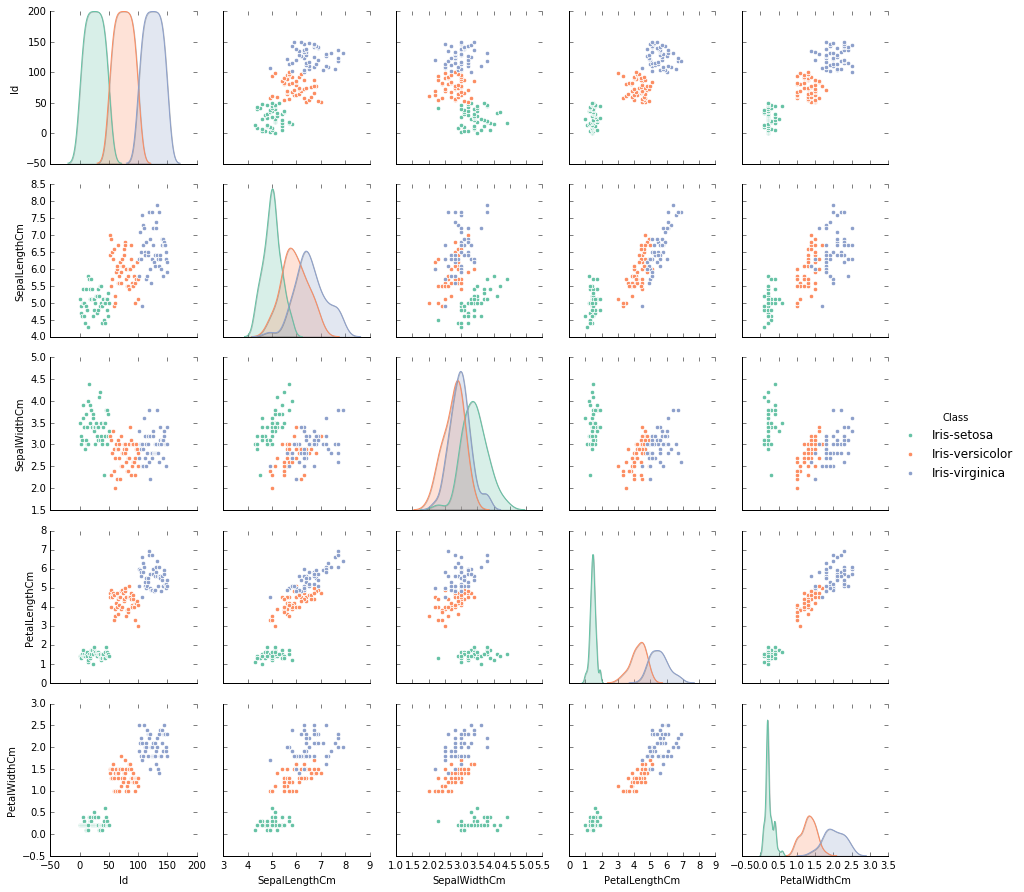

In [132]:
sns.pairplot(df,hue='Class',palette='Set2')

In [185]:
features_ = df.drop(['Class','Id'],axis=1).values
class_ = df['Class'].values

#### utilizando matriz de correlação, para ver a magnitude dos dados

               SepalLengthCm  PetalLengthCm  SepalWidthCm  PetalWidthCm
SepalLengthCm       1.000000      -0.109369      0.871754      0.817954
PetalLengthCm      -0.109369       1.000000     -0.420516     -0.356544
SepalWidthCm        0.871754      -0.420516      1.000000      0.962757
PetalWidthCm        0.817954      -0.356544      0.962757      1.000000


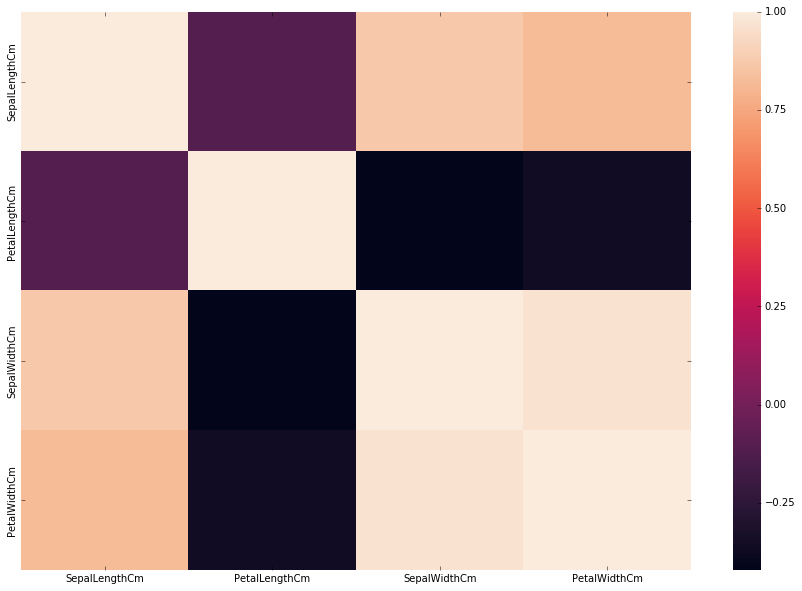

In [186]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
features_ = scaler.fit_transform(features_)

features_ = pd.DataFrame(features_)
features_ = features_.rename(index=str, columns={0: "SepalLengthCm",1: "PetalLengthCm",2: "SepalWidthCm",3: "PetalWidthCm"})
corr = features_.corr()
sns.heatmap(corr)
print(corr)

#### transformando variáveis categóricas em quantitativas

In [187]:
from sklearn.preprocessing import LabelEncoder
labelencoder_forecast = LabelEncoder()
class_ = labelencoder_forecast.fit_transform(class_)

features_ = features_.drop(["SepalWidthCm","PetalWidthCm"],axis=1).values

In [188]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics 

X_train, X_test, y_train, y_test = train_test_split(features_, class_, test_size=0.3, random_state=1) 


classifier_gnb = GaussianNB() 
classifier_gnb.fit(X_train, y_train) 

y_pred = classifier_gnb.predict(X_test)

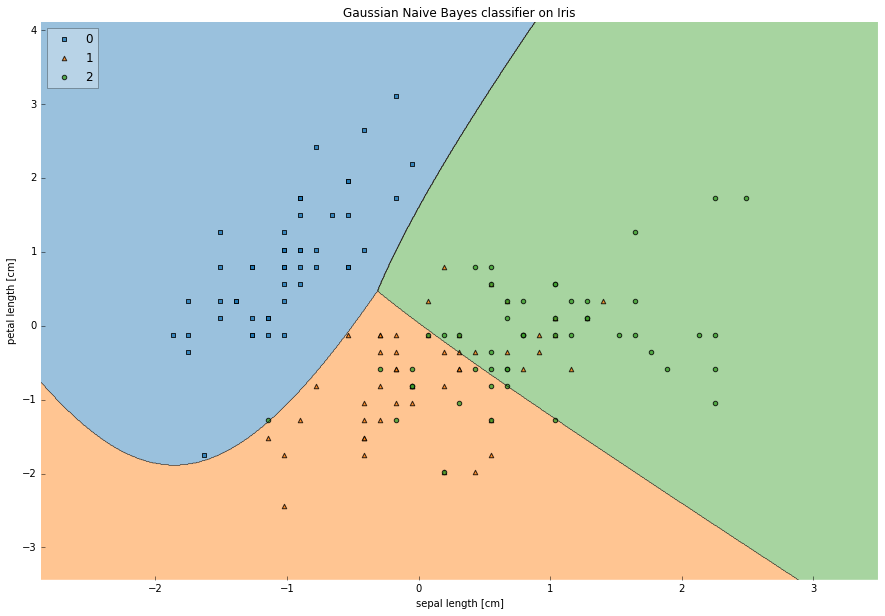

In [189]:

from mlxtend.plotting import plot_decision_regions

#Plotting decision regions
plot_decision_regions(features_, class_, clf=classifier_gnb, legend=2)

# Adding axes annotations
plt.xlabel('sepal length [cm]')
plt.ylabel('petal length [cm]')
plt.title('Gaussian Naive Bayes classifier on Iris')
plt.show()

#### avaliando o algoritmo com validação cruzada

In [193]:
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classifier_gnb, features_, class_, scoring='accuracy', cv=10)
print(scores_dt.mean())

0.7933333333333333


In [194]:
print(classification_report(y_test,y_pred ))
# comparing actual response values (y_test) with predicted response values (y_pred) 
print("Gaussian Naive Bayes model accuracy(in %):", metrics.accuracy_score(y_test, y_pred)*100)
print(confusion_matrix(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       0.73      0.61      0.67        18
           2       0.56      0.69      0.62        13

   micro avg       0.76      0.76      0.76        45
   macro avg       0.77      0.77      0.76        45
weighted avg       0.77      0.76      0.76        45

Gaussian Naive Bayes model accuracy(in %): 75.55555555555556
[[14  0  0]
 [ 0 11  7]
 [ 0  4  9]]
